<a href="https://colab.research.google.com/github/PAVAN143258/YBI_PROJECTS/blob/main/Project_2_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [2]:
#Dataset
df = pd.read_csv("https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv")

In [42]:
df.shape

(48842, 10)

In [4]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Gender         48842 non-null  object
 2   WorkingClass   48842 non-null  object
 3   Education      48842 non-null  object
 4   MaritalStatus  48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   NativeCountry  48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,Age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


Plot the dataset

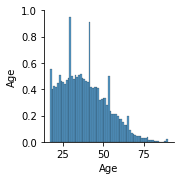

In [7]:
sns.pairplot(df)
#Gives a scatter plot- gives a sense of correlation
#Here we have positive correlation- X increases -> Y increases

In [8]:
df.columns
#Gives names of columns

Index(['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'],
      dtype='object')

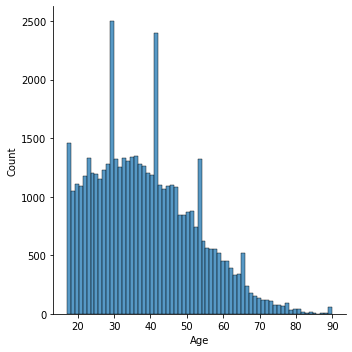

In [9]:
sns.displot(df.Age)

In [10]:
df.WorkingClass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: WorkingClass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

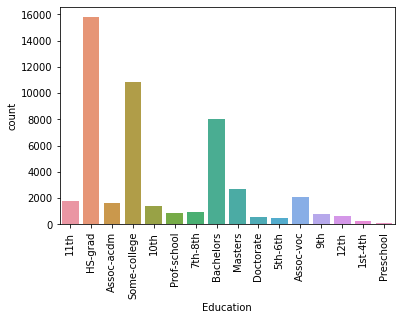

In [11]:
sns.countplot(df.Education)
plt.xticks(rotation= 90 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

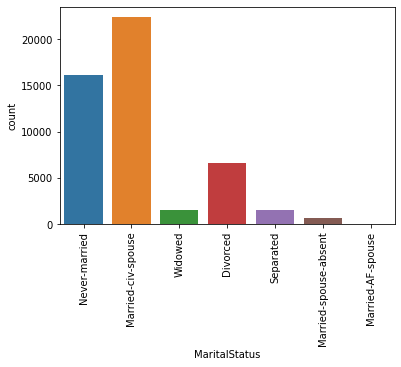

In [12]:
sns.countplot(df.MaritalStatus)
plt.xticks(rotation= 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

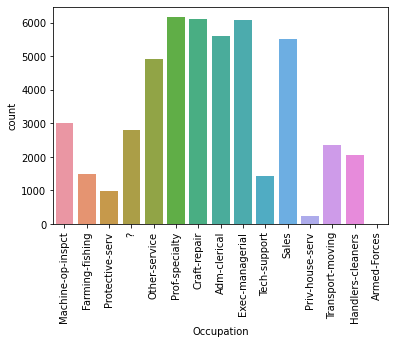

In [13]:
sns.countplot(df.Occupation)
plt.xticks(rotation= 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

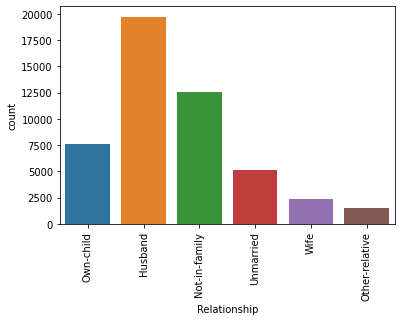

In [14]:
sns.countplot(df.Relationship)
plt.xticks(rotation= 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

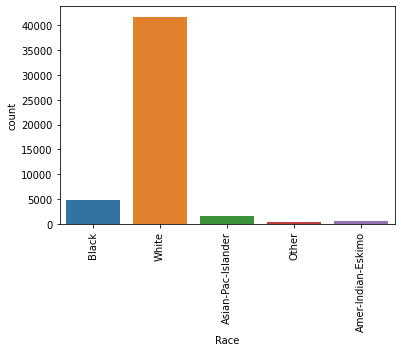

In [15]:
sns.countplot(df.Race)
plt.xticks(rotation= 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

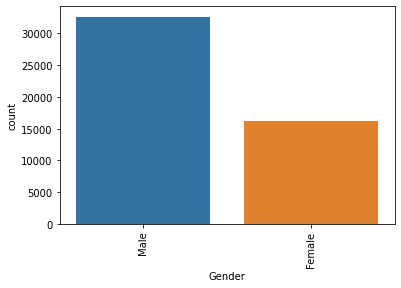

In [16]:
sns.countplot(df.Gender)
plt.xticks(rotation= 90)

Split the dataset into train and test

In [17]:
y = df['Income']

In [18]:
X = df[['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry']]

In [19]:
y.shape

(48842,)

In [20]:
X.shape

(48842, 9)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2529)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34189, 9), (14653, 9), (34189,), (14653,))

Encoding the Data

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
df.columns

Index(['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'],
      dtype='object')

In [27]:
df['Age'] = le.fit_transform(df['Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['WorkingClass'] = le.fit_transform(df['WorkingClass'])
df['Education'] = le.fit_transform(df['Education'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['NativeCountry'] = le.fit_transform(df['NativeCountry'])
df['Income'] = le.fit_transform(df['Income'])

In [28]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,8,1,4,1,4,7,3,2,39,0
1,21,1,4,11,2,5,0,4,39,0
2,11,1,2,7,2,11,0,4,39,1
3,27,1,4,15,2,7,0,2,39,1
4,1,0,0,15,4,0,3,4,39,0


Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
#Dividing the dataset into independent and dependent data before scaling
ds_x = df.drop('Income', axis='columns')
y = df['Income']

In [31]:
dataset = sc.fit_transform(ds_x)
x = pd.DataFrame(dataset, columns=ds_x.columns)

Fitting data into various classfication models

In [32]:
#Importing necessary models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [33]:
#Creating instances for classification models
dt = DecisionTreeClassifier()
gnb= GaussianNB()
svc = SVC()
knn= KNeighborsClassifier()
lg =LogisticRegression()

In [34]:
#Fitting models and checking for classification metrics
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.3, random_state= 11) 
for i in [dt, gnb, svc, knn, lg]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = accuracy_score(y_test, pred)
    train_score = accuracy_score (y_train, i.predict(x_train)) 
    if abs(train_score - test_score) <= 0.01:
        print(i)
        print('Accuracy score for train data', accuracy_score (y_test, pred))
        print('Accuracy score for test data', accuracy_score (y_train, i.predict(x_train)))
        print(classification_report (y_test, pred)) 
        print(confusion_matrix (y_test, pred))
        print('----------------------------')

GaussianNB()
Accuracy score for train data 0.7522691598989968
Accuracy score for test data 0.7549504226505601
              precision    recall  f1-score   support

           0       0.89      0.77      0.83     11157
           1       0.49      0.69      0.57      3496

    accuracy                           0.75     14653
   macro avg       0.69      0.73      0.70     14653
weighted avg       0.79      0.75      0.76     14653

[[8628 2529]
 [1101 2395]]
----------------------------
SVC()
Accuracy score for train data 0.7971746400054597
Accuracy score for test data 0.8045277720904385
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     11157
           1       0.58      0.54      0.56      3496

    accuracy                           0.80     14653
   macro avg       0.72      0.71      0.71     14653
weighted avg       0.79      0.80      0.79     14653

[[9801 1356]
 [1616 1880]]
----------------------------
LogisticRegression()


Ensemble Models

In [35]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [36]:
rfc = RandomForestClassifier()
ad = AdaBoostClassifier()
gd = GradientBoostingClassifier()

In [37]:
#Fitting models and checking for classification metrics
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.3, random_state= 11) 
for i in [rfc, ad, gd]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = accuracy_score(y_test, pred)
    train_score = accuracy_score (y_train, i.predict(x_train)) 
    if abs(train_score - test_score) <= 0.01:
        print(i)
        print('Accuracy score for train data', accuracy_score(y_test, pred))
        print('Accuracy score for test data', accuracy_score(y_train, i.predict(x_train)))
        print(classification_report (y_test, pred)) 
        print(confusion_matrix (y_test, pred))
        print('---------------------------------------------')

AdaBoostClassifier()
Accuracy score for train data 0.8318433085375009
Accuracy score for test data 0.8352394044868232
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     11157
           1       0.68      0.56      0.62      3496

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.75     14653
weighted avg       0.82      0.83      0.83     14653

[[10218   939]
 [ 1525  1971]]
---------------------------------------------
GradientBoostingClassifier()
Accuracy score for train data 0.8362110148092541
Accuracy score for test data 0.840124016496534
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11157
           1       0.70      0.55      0.62      3496

    accuracy                           0.84     14653
   macro avg       0.78      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

[[10327   830]
 [ 1570  19

Highest accuracy is for Gradient Boosting

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
for i in range(2,9):
    cv = cross_val_score(gd, x, y, cv =i)
    print(gd, cv.mean())

GradientBoostingClassifier() 0.8373530977437451
GradientBoostingClassifier() 0.8375374105197212
GradientBoostingClassifier() 0.8377626599209598
GradientBoostingClassifier() 0.8383768512927074
GradientBoostingClassifier() 0.8378445152950742
GradientBoostingClassifier() 0.8378240978507472
GradientBoostingClassifier() 0.837721724419235


Check accuracy

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,pred)

0.8362110148092541